# Investigating Tree Canopy Inequity In Vancouver, British Columbia
Group 50: Paul English, Zhuoran Wang, Junyao Wang, Halley Suarez, Eric Shuai

<h2 style="color:#008a05">Introduction</h2>

Urban tree cover provides a variety of ecosystem services beyond aesthetic benefits. They reduce temperature through shading, increase air purification, and mitigate stormwater runoff [(McDonald et. al. 2021)](https://doi.org/10.1371/journal.pone.0249715). Larger trees are better equipped to provide these ecosystem services as they have greater structural complexity and a more developed canopy [(Baró et. al., 2019)](https://www.sciencedirect.com/science/article/pii/S0169204620314766). Thus, urban tree cover is an integral piece of life in a city environment, yet there are many areas in and around Vancouver that exhibit little to no tree cover at all. 
<br>This phenomenon is known as **tree canopy inequity**, where low-income and minority neighbourhoods tend to have less tree cover and fewer large trees than wealthier and non-minority neighbourhoods. This has been observed in cities across Canada [(Kiani et. al., 2023)](https://doi.org/10.1016/j.landurbplan.2023.104871).

In this study, wealth is analyzed in the Greater Vancouver Area to see if high-income neighbourhoods correlate to having more trees as well as bigger trees. This study plans to investigate if there is a positive association between income and mean tree diameter in two neighbourhoods in Vancouver to test if tree canopy inequity is present. Additionally, the standard deviation of tree diameter will be explored to quantify the observed variation in tree size.

**Question:** Does there exist a positive association between the wealthiness of a neighbourhood and the corresponding mean tree diameter in that community for the Greater Vancouver Area?

<h2 style="color:#008a05">Preliminary Exploratory Data Analysis</h2>

### Loading Libraries, Reading Data

In [2]:
# --- Setting up prerequisites libraries ---
library(tidyverse)
library(tidymodels)
# library(broom)
library(repr)
# library(digest)
library(infer)
library(gridExtra)
options(repr.matrix.max.rows = 8)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [ ]:
street_trees <- read_csv(url("https://github.com/eshuaiii/stat-201-2023w1-group-50/raw/main/streettrees.csv"))


# street_trees <- street_trees <- read.csv("streettrees.csv", sep=";")
# street_trees <- na.omit(street_trees)
# data <- readLines("AreaProfiles.txt")
# csv_content <- data[5:length(data)]
# csv_string <- paste(csv_content, collapse = "\n")
# AreaProfiles <- read.csv(text = csv_string, header = TRUE, stringsAsFactors = FALSE)
# AreaProfiles <- na.omit(AreaProfiles)

In [2]:
AreaProfiles_averageincome <- AreaProfiles %>%  slice(c(1882))%>%select(-ID)
AreaProfiles_averageincome[1, "Variable"] <- "Avg_income"

AreaProfiles_averageincome

Variable,Arbutus.Ridge,Downtown,Dunbar.Southlands,Fairview,Grandview.Woodland,Hastings.Sunrise,Kensington.Cedar.Cottage,Kerrisdale,Killarney,⋯,Riley.Park,Shaughnessy,South.Cambie,Strathcona,Sunset,Victoria.Fraserview,West.End,West.Point.Grey,Vancouver.CSD,Vancouver.CMA
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Avg_income,62675,63251,78117,61627,42896,38258,38411,77248,39013,⋯,53060,118668,65459,31534,34212,34298,47253,82042,50317,46821


table1.1

filter out the average income for each location in Vancouver

In [3]:
long_format <- AreaProfiles_averageincome %>%
  pivot_longer(cols = -Variable, names_to = "Location", values_to = "Value")

final_Areaincome<- long_format %>%
  pivot_wider(names_from = Variable, values_from = Value)
final_Areaincome

Location,Avg_income
<chr>,<chr>
Arbutus.Ridge,62675
Downtown,63251
Dunbar.Southlands,78117
Fairview,61627
Grandview.Woodland,42896
Hastings.Sunrise,38258
Kensington.Cedar.Cottage,38411
Kerrisdale,77248
Killarney,39013


table1.2

Rearrange the table so that we can directly and clearly see the average income for each location

In [4]:
areaavgincome <- AreaProfiles_averageincome %>% group_by(Variable) %>% summarize(mean = mean(Arbutus.Ridge:Vancouver.CMA))%>%
filter(Variable =="Avg_income")
areaavgincome


Variable,mean
<chr>,<dbl>
Avg_income,54748


table1.3

Calculate out the total average income among all locations.

In [5]:
lowincomearea <- final_Areaincome %>% filter(Avg_income < 54748.0)%>% select(Location,Avg_income)
Highincomearea <- final_Areaincome %>% filter(Avg_income >= 54748.0)%>% select(Location,Avg_income)

Filter out the low income area and high income area by comparing each income to the total average income

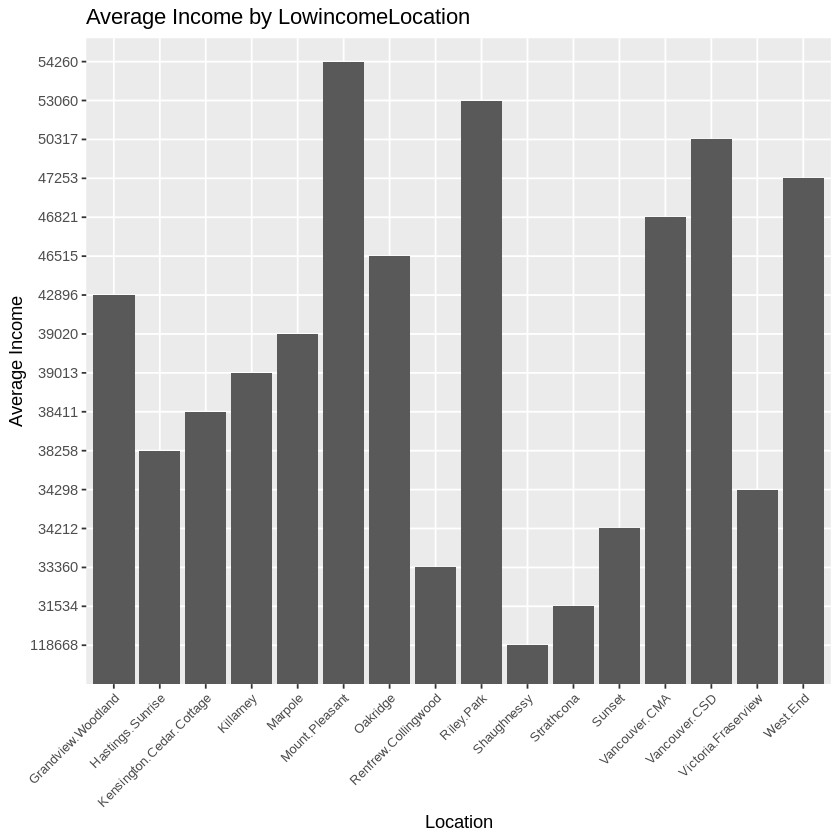

In [6]:
lowincomearea_plot<- lowincomearea %>% ggplot(aes(x=Location, y= Avg_income))+ geom_bar(stat="identity") +
labs(title="Average Income by LowincomeLocation",
       x="Location",
       y="Average Income") +theme(axis.text.x = element_text(size=8, angle=45, hjust=1))
lowincomearea_plot

graph1.1

the visualization of income in each low income location

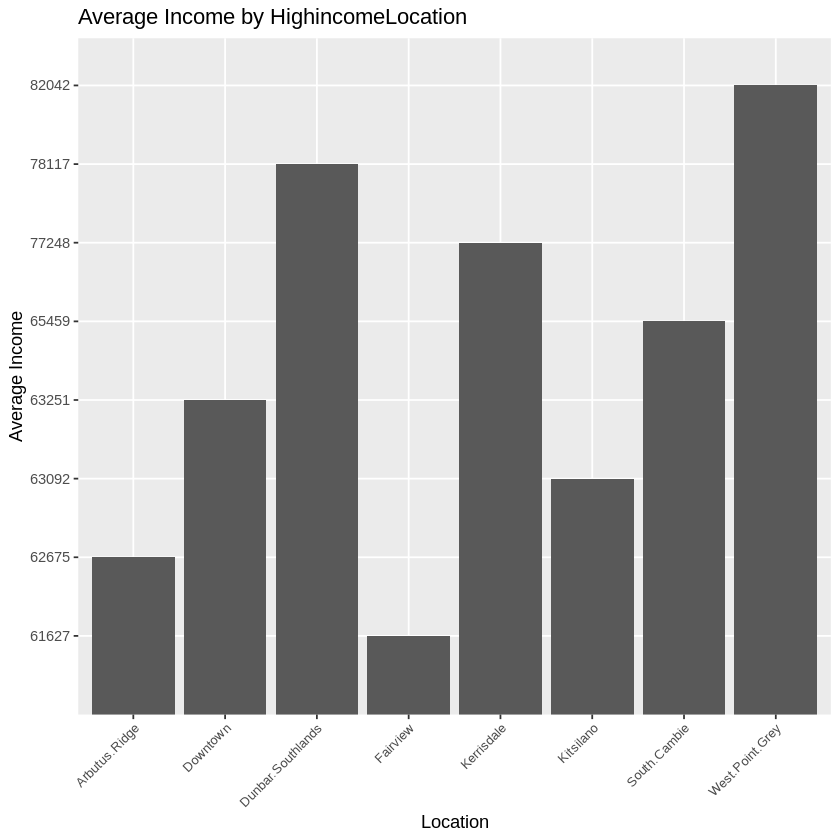

In [7]:
Highincomearea_plot<- Highincomearea %>% ggplot(aes(x=Location, y= Avg_income))+ geom_bar(stat="identity") +
labs(title="Average Income by HighincomeLocation",
       x="Location",
       y="Average Income") +theme(axis.text.x = element_text(size=8, angle=45, hjust=1))
Highincomearea_plot

graph1.2

the visualization of income in each High income location

In [8]:
AreatreeDiameter <- street_trees %>% select("NEIGHBOURHOOD_NAME", "DIAMETER")
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "MOUNT PLEASANT"]<- "Mount.Pleasant"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "DUNBAR-SOUTHLANDS"]<- "Dunbar.Southlands"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "KENSINGTON-CEDAR COTTAGE"]<- "Kensington.Cedar.Cottage"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "GRANDVIEW-WOODLAND"]<- "Grandview.Woodland"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "MARPOLE"]<- "Marpole"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "KILLARNEY"]<- "Killarney"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "WEST END"]<- "West.End"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "VICTORIA-FRASERVIEW"]<- "Victoria.Fraserview"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "RILEY PARK"]<- "Riley.Park"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "KITSILANO"]<- "Kitsilano"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "OAKRIDGE"]<- "Oakridge"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "RENFREW-COLLINGWOOD"]<- "Renfrew.Collingwood"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "WEST POINT GREY"]<- "West.Point.Grey"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "FAIRVIEW"]<- "Fairview"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "DOWNTOWN"]<- "Downtown"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "ARBUTUS RIDGE"]<- "Arbutus.Ridge"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "SOUTH CAMBIE"]<- "South.Cambie"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "SHAUGHNESSY"]<- "Shaughnessy"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "STRATHCONA"]<- "Strathcona"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "HASTINGS-SUNRISE"]<- "Hastings.Sunrise"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "KERRISDALE"]<- "Kerrisdale"
AreatreeDiameter$NEIGHBOURHOOD_NAME[AreatreeDiameter$NEIGHBOURHOOD_NAME == "SUNSET"]<- "Sunset"


In [9]:
dinhigh <- AreatreeDiameter %>% filter(NEIGHBOURHOOD_NAME %in% Highincomearea$Location)
dinlow <- AreatreeDiameter %>% filter(NEIGHBOURHOOD_NAME %in% lowincomearea$Location)

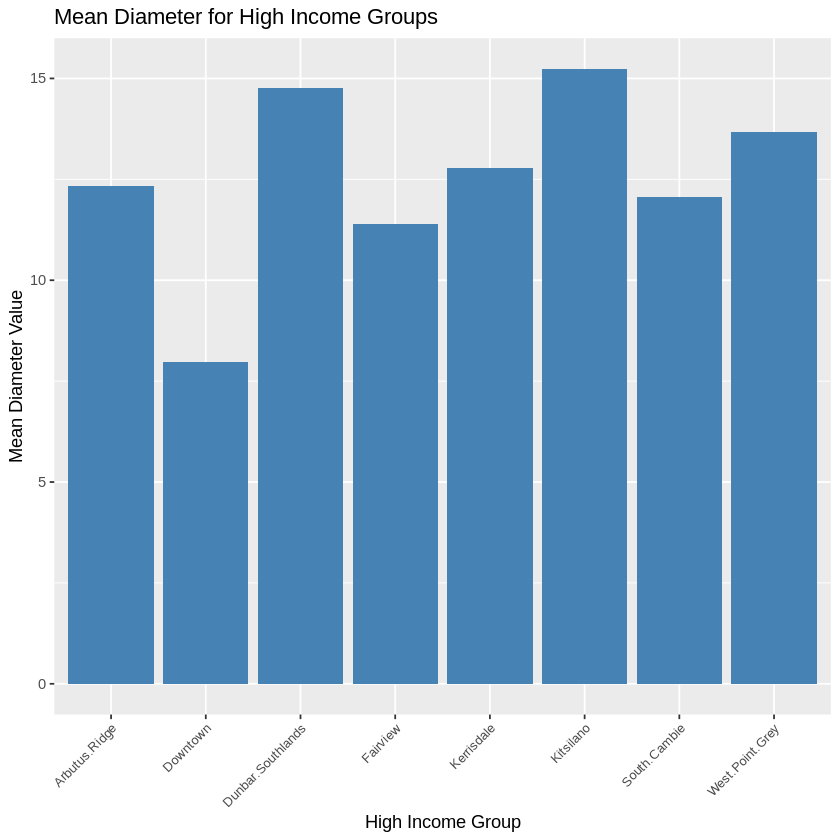

In [10]:
mean_for_eachhigh <- dinhigh %>% group_by(NEIGHBOURHOOD_NAME) %>% summarize(mean = mean(DIAMETER))
mean_for_eachhigh_plot <- mean_for_eachhigh %>% ggplot(aes(x=NEIGHBOURHOOD_NAME, y=mean))+ 
geom_bar(stat="identity", fill="steelblue")+
labs(title="Mean Diameter for High Income Groups", y="Mean Diameter Value", x="High Income Group")+
theme(axis.text.x = element_text(size=8, angle=45, hjust=1))
mean_for_eachhigh_plot

graph1.3

Mean Tree Diameter among High Income Locations

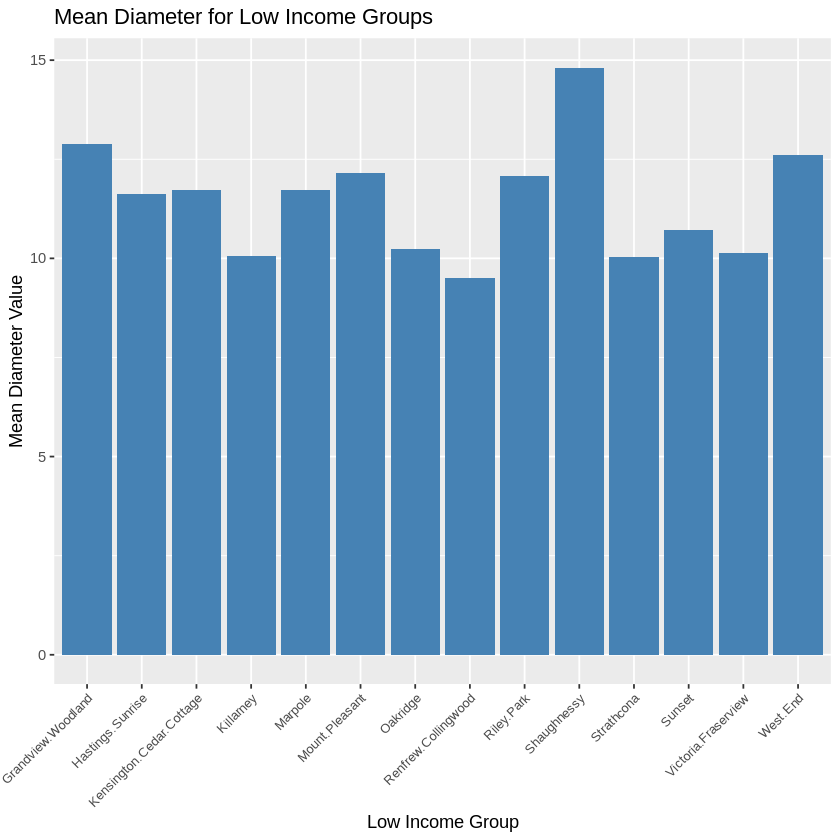

In [11]:
mean_for_eachlow <- dinlow %>% group_by(NEIGHBOURHOOD_NAME) %>% summarize(mean = mean(DIAMETER))
mean_for_eachlow_plot <- mean_for_eachlow %>% ggplot(aes(x=NEIGHBOURHOOD_NAME, y=mean))+ 
geom_bar(stat="identity", fill="steelblue")+
labs(title="Mean Diameter for Low Income Groups", y="Mean Diameter Value", x="Low Income Group")+
theme(axis.text.x = element_text(size=8, angle=45, hjust=1))
mean_for_eachlow_plot

graph1.4

Mean Tree Diameter among Lower Income Locations

In [15]:

mean_d_inhigh <- mean(dinhigh$DIAMETER)
mean_d_inlow <- mean(dinlow$DIAMETER)
mean_f <- data.frame(Mean_For_Low = c(mean_d_inlow), Mean_For_High = c(mean_d_inhigh))
mean_f

Mean_For_Low,Mean_For_High
<dbl>,<dbl>
11.40866,12.9423


In [ ]:
table1.4

In [ ]:
The mean of tree diamters in all low income area and high income area

In [16]:
bootstrapforhigh <- dinhigh %>% rep_sample_n(size=20, reps=1000, replace= TRUE)%>% group_by(replicate) %>% summarize(mean = mean(DIAMETER))
bootstrapfordlow <- dinlow %>% rep_sample_n(size=20, reps=1000, replace= TRUE)%>% group_by(replicate) %>% summarize(mean_for_low = mean(DIAMETER))
bootstrapdifmean <- bootstrapfordlow %>% mutate(mean_for_high = bootstrapforhigh$mean, dif_in_mean = bootstrapforhigh$mean - mean_for_low)


In [ ]:
bootstrapdifmean_plot <- bootstrapdifmean %>% ggplot() + 
    geom_histogram(aes(dif_in_mean, y = ..density..), color='red', binwidth=.05) + 
    theme(text = element_text(size=10)) +
    xlab("the difference in diameter") +
    ggtitle("the bootstrapped distribution for difference of tree diameter in high and low income area")
bootstrapdifmean_plot